# Phase 2 - Week 1 - Day 2 PM - Training Artificial Neural Network: Part 2

In this notebook, we will use Fashion MNIST to demonstrate implementation of transfer learning and dropout layer.

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

*Source : [url](https://github.com/zalandoresearch/fashion-mnist)*

<img src='https://www.researchgate.net/profile/Saeed-Reza-Kheradpisheh/publication/342801790/figure/fig2/AS:911232181735425@1594266090934/Sample-images-from-Fashion-MNIST-dataset.png'>

# A. Import Libraries & Data Loading

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

In [2]:
# Data Loading

## Download the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Data splitting
(X_train_val, y_train_val), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (51000, 28, 28)
Val Size   :  (9000, 28, 28)
Test Size  :  (10000, 28, 28)


In [3]:
# Define the Class Names

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Function for Visualize A Group of Images

def plot_digits(instances, n_data, images_per_row=10):
  n_rows = int(np.ceil(n_data/images_per_row))
  n_cols = images_per_row
  plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
  for row in range(n_rows):
      for col in range(n_cols):
          index = n_cols * row + col
          plt.subplot(n_rows, n_cols, index + 1)
          plt.imshow(instances[index], cmap='gray', interpolation='nearest')
          plt.axis('off')
          plt.title(class_names[y_train[index]], fontsize=12)
          if index == n_data-1:
            break
  plt.subplots_adjust(wspace=0.2, hspace=0.5)
  plt.show()

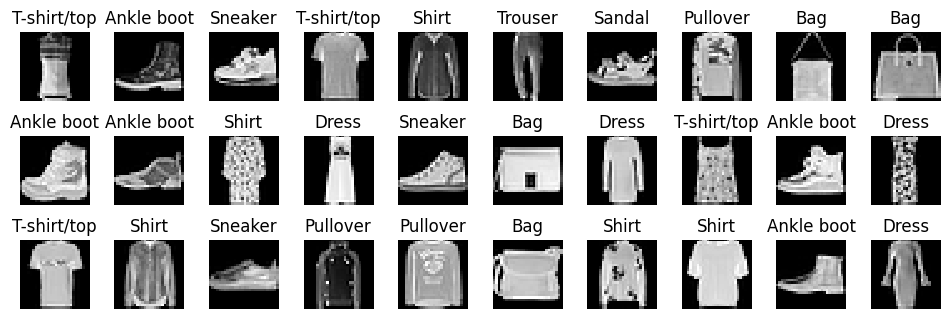

In [5]:
# Visualization of the First 50 Images

plot_digits(X_train, 30, images_per_row=10)

In [6]:
# Feature Scaling

X_train_scaled = X_train / 255.
X_val_scaled = X_val / 255.
X_test_scaled = X_test / 255.

# B - Model Building

## B.1 - Without Dropout & Transfer Learning

For first scenario, we will create a simple ANN model.

In [9]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Sequential API
model_1 = Sequential()
model_1.add(Flatten(input_shape=[28, 28]))
model_1.add(Dense(10, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_1.add(Dense(10, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_1.add(Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

# Compile
model_1.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
model_1.summary()

# Train the Model
history_model_1 = model_1.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_val_scaled, y_val))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8070 (31.52 KB)
Trainable params: 8070 (31.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30


1594/1594 [==============================] - 6s 3ms/step - loss: 0.6898 - accuracy: 0.7700 - val_loss: 0.5300 - val_accuracy: 0.8172
Epoch 2

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf

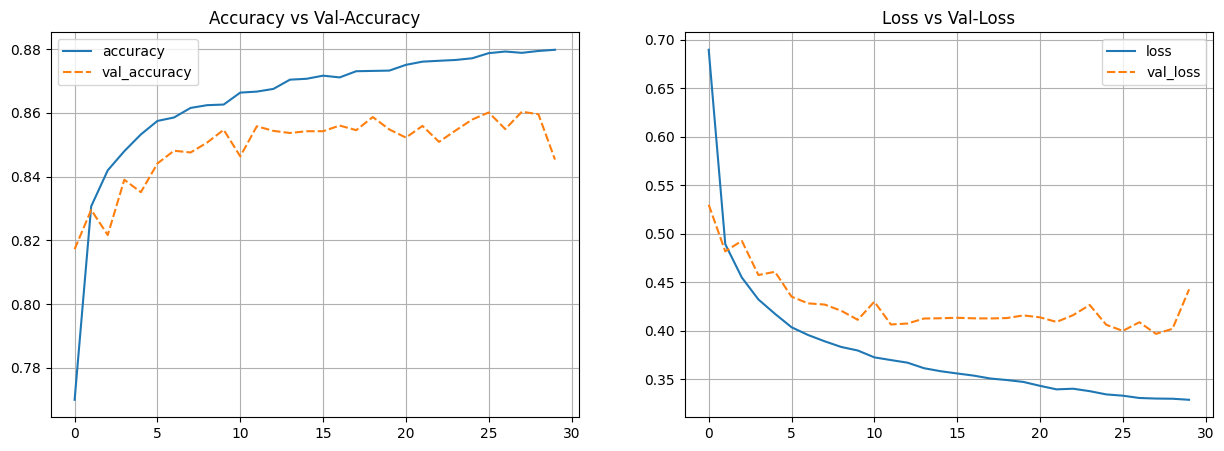

In [10]:
# Plot Training Results

history_model_1 = pd.DataFrame(history_model_1.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model_1[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model_1[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

It can be seen that out model is overfit during the training. To improve this model, in the next scenarios we will add Dropout layer and Transfer Learning.

## B.2 - Add Dropout

For the second scenario, we will add Dropout Layer to reduce overfitting.

In [11]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Sequential API
model_2 = Sequential()
model_2.add(Flatten(input_shape=[28, 28]))
model_2.add(Dense(10, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_2.add(Dropout(0.1, seed=seed))
model_2.add(Dense(10, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_2.add(Dropout(0.1, seed=seed))
model_2.add(Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

# Compile
model_2.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
model_2.summary()

# Train the Model
history_model_2 = model_2.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_val_scaled, y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8070 (31.52 KB)
Trainable params: 8070 (31

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf

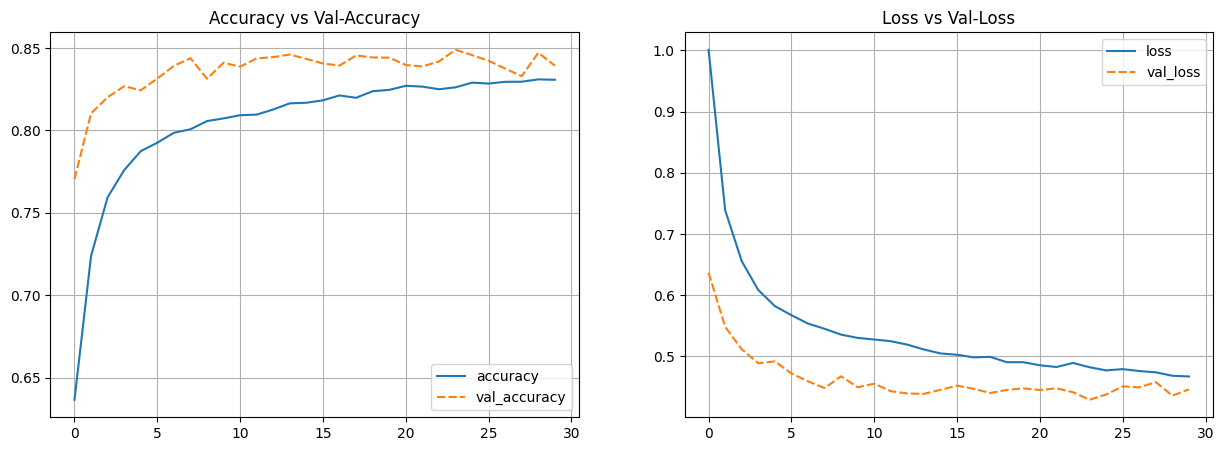

In [12]:
# Plot Training Results

history_model_2 = pd.DataFrame(history_model_2.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model_2[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model_2[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Adding Dropout Layer was succesfully reduce the overfitting. Both loss on train-set and val-set decreasing as epochs increasing.

## B.3 - Transfer Learning

For last scenario, we will implement Transfer Learning. Transfer learning is a technique where a model trained on one task or dataset is adapted and fine-tuned for a different but related task or dataset. It leverages knowledge gained from the source task to improve performance on the target task.

We will add `EfficientNet` layers into our model. Please see this [source](https://keras.io/api/applications/) or [source](https://www.tensorflow.org/api_docs/python/tf/keras/applications/) for more details.

<img src='https://miro.medium.com/v2/resize:fit:1100/format:png/1*gw37manvc-f9xuFXx9_8WA.png'>

First, we will change our dataset so it can be processed by `EfficientNet`. `EfficientNet` was trained on dataset called [imagenet](https://www.image-net.org/) with millions of images. The requirement of `EfficientNet` is the image should have exactly 3 inputs channels, and width and height should be no smaller than 32.

In [13]:
# Change the Image Dimension

## Step 1 : Expand 1 dimensions
X_train_new = np.expand_dims(X_train, -1)
X_val_new = np.expand_dims(X_val, -1)
X_test_new = np.expand_dims(X_test, -1)

## Step 2 : Convert to RGB
X_train_new = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_train_new))
X_val_new = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_val_new))
X_test_new = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_test_new))

## Step 3 : Resize the image
X_train_new = tf.image.resize(X_train_new, (32, 32))
X_val_new = tf.image.resize(X_val_new, (32, 32))
X_test_new = tf.image.resize(X_test_new, (32, 32))

print('Train size - Before : ', X_train_scaled.shape, ' - After : ', X_train_new.shape)
print('Val size   - Before : ', X_val_scaled.shape, '  - After : ', X_val_new.shape)
print('Test size  - Before : ', X_test_scaled.shape, ' - After : ', X_test_new.shape)

Train size - Before :  (51000, 28, 28)  - After :  (51000, 32, 32, 3)
Val size   - Before :  (9000, 28, 28)   - After :  (9000, 32, 32, 3)
Test size  - Before :  (10000, 28, 28)  - After :  (10000, 32, 32, 3)


In [14]:
# Download the EfficientNet Model
pretrained_model= tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(32, 32, 3)
)

# Freeze the Lower Layer
pretrained_model.trainable= False

# Preprocessing
X_train_new = tf.keras.applications.efficientnet.preprocess_input(X_train_new)
X_val_new = tf.keras.applications.efficientnet.preprocess_input(X_val_new)
X_test_new = tf.keras.applications.efficientnet.preprocess_input(X_test_new)


16705208/16705208 [==============================] - 6s 0us/step


In [15]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Sequential API
model_3 = Sequential()
model_3.add(pretrained_model)
model_3.add(Flatten())
model_3.add(Dense(10, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_3.add(Dense(10, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_3.add(Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

# Compile
model_3.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
model_3.summary()

# Train the Model
history_model_3 = model_3.fit(X_train_new, y_train, epochs=30, validation_data=(X_val_new, y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1, 1, 1280)        4049571   
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 4062601 (15.50 MB)
Trainable params: 13030 (50.90 KB)
Non-trainable params: 4049571 (15.45 MB)
_____________

KeyboardInterrupt: 

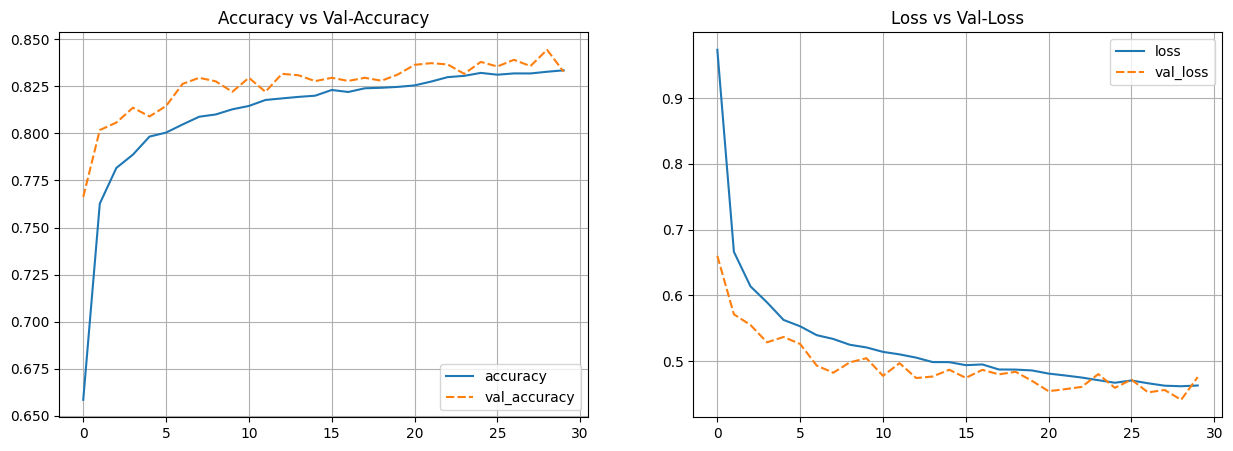

In [ ]:
# Plot Training Results

history_model_3 = pd.DataFrame(history_model_3.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model_3[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model_3[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

**INSIGHTS**

1. It can be seen, our model is considered as good-fit.

2. Even though, there is no `Dropout` layer or `BatchNormalization` layer, the model can still convergence.

3. Both losses are still on a downward trend so there is a possibility that if the number of epochs is increased, the model could have higher performance.